### Project Workflow

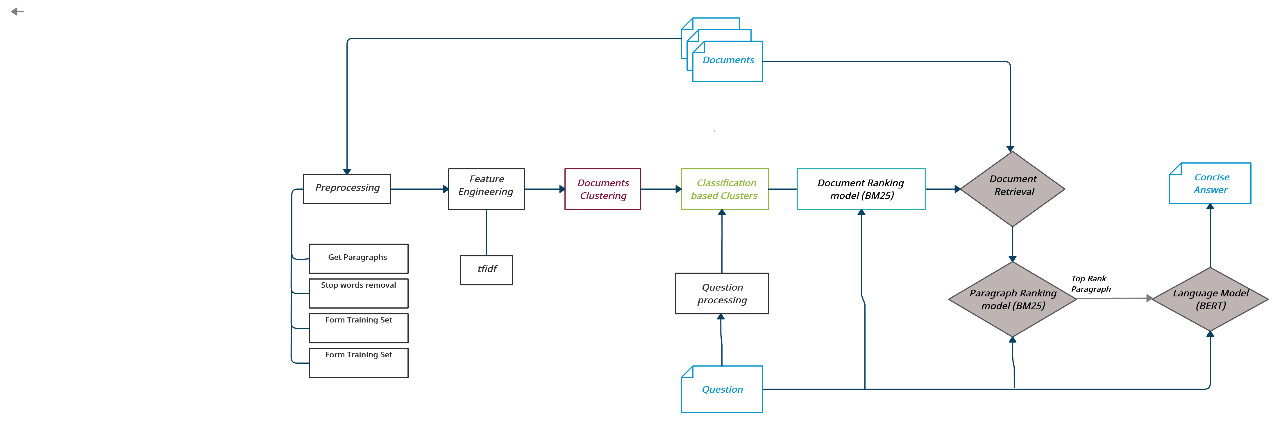

In [ ]:
 !pip install mlxtend --upgrade --no-deps

     |████████████████████████████████| 1.3 MB 4.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score ,silhouette_samples
from sklearn.cluster import KMeans
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download("stopwords")
print(stopwords.words('english'))
nltk.download('punkt')

In [ ]:
def build_model(model, model_name, X_train, X_test, y_train, y_test, cv ):

  global general_model
  general_model = model.fit(X_train, y_train) # train the model   
  # make prediction of X_test and print Classification report
  global y_pred
  y_pred = model.predict(X_test)
  # 2- Applying K_Fold Cross Vaildation

  cv_accuracies = cross_val_score(estimator = model , X= X_train , y = y_train ,cv = cv)
  accuracy_avg = cv_accuracies.mean()# measure the accuracy of the model (bais)
  test_accuracy = accuracy_score(y_test, y_pred)
  # Evaluate the model performance using metrics.accuracy_score to measure the score
  print("cross_validation accuracy :  ", cv_accuracies)
  print("\n average cross validation accuracy :  " , accuracy_avg)
  print("\n testing accuracy :  "  ,test_accuracy,"\n")
  print("----------------------------------------------------------------------------------------------")

 

  print(classification_report(y_test, y_pred))

  # print Confusion Matrix
  print('\nConfusion Matrix:\n')
  print(confusion_matrix(y_test, y_pred))
  print("----------------------------------------------------------------------------------------------")
  plot_confusion_matrix(general_model, X_test, y_test, xticks_rotation='vertical')
 
  plot_learning_curve(general_model,"Learning Curve of "+ model_name,X_train, y_train, ylim=(0, 1.1), cv=cv, n_jobs=8)

  print("----------------------------------------------------------------------------------------------")
  return general_model, y_pred


def which_one_misclassify(original_data, X_train, y_train, X_test, y_test ,y_pred , document = True):
  errors  = [] 
  correct = []
  predict = []
  gg=np.array(y_test)

  for index ,text in enumerate(X_test) :
    if y_pred[index] != gg[index]:
      if document == True:
        error = original_data.doc_content[index]
      else :
        error  = original_data.paragraph[index]
      errors.append(error)
      corr = gg[index]
      correct.append(corr)
      pred = y_pred[index]
      predict.append(pred)
  document_df = pd.DataFrame()
  document_df['doc_error'] = errors
  document_df['correct']   = correct
  document_df['Predicted'] = predict
  #document_df['book_name'] = 
  print(" The Documents that the Model Misclassify are  : " , len(errors))
  print("----------------------------------------------------------------------------------------------\n")

  #label_encoder object knows how to understand word labels. 
  label_encoder = LabelEncoder()
  X_train_copy = np.copy(X_train)
  X_test_copy = np.copy(X_test)
  y_train_copy = np.copy(y_train)
  y_test_copy = np.copy(y_test)

  avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
         general_model,
         np.array(X_train_copy),
         label_encoder.fit_transform(y_train_copy),
         np.array(X_test_copy),
         label_encoder.fit_transform(y_test_copy),num_rounds=2,
         random_seed=123)
  
  print('Average bias: %.3f' % avg_bias)
  print('Average variance: %.3f' % avg_var)
  print("----------------------------------------------------------------------------------------------")

  return document_df 

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0,5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
    return plt

  

In [ ]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')
my_dir_path = "drive/MyDrive/history_data"
doc_list = []
kings_name = []
for file in Path(my_dir_path).iterdir():
    kings_name.append(file.stem)
    ls = [ ]
    with open(file, "r") as file1:
        i = 0;
        for line in file1:
            ls.append(line)
            i = i + 1;
        doc_list.append(ls)
        
document_names = [name for name in  kings_name]        
paragraphs_content = []   #book_content

Mounted at /content/drive


In [ ]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')
my_dir_path = "drive/MyDrive/history_data"
doc_text = []
kings_name = []
for file in Path(my_dir_path).iterdir():
    kings_name.append(file.stem)
    with open(file, "r") as file1:
       text = file1.read()
       doc_text.append(text)

      

In [ ]:
doc_data = pd.DataFrame()
doc_data['document']= document_names
doc_data['doc_content'] = doc_text
  
doc_lemma = []
for i in range(len(doc_data['doc_content'])):
  text= re.findall(r"[a-zA-Z]{3,}", doc_data['doc_content'][i])
  lemmatizer = WordNetLemmatizer()
  lst = []
  for j in text:
    W = j.lower()
    w = lemmatizer.lemmatize(W)
    if w not in set(stopwords.words('english')):
      lst.append(str(w))
      l = " ".join(lst)
  doc_lemma.append(l)

doc_data['lemma_doc'] = doc_lemma
doc_data.head()

,document,doc_content,lemma_doc
0,Ramesses I,Menpehtyre Ramesses I (or Ramses) was the foun...,menpehtyre ramesses ramses wa founding pharaoh...
1,Tiye,"Tiye (c. 1398 BC – 1338 BC, also spelled Tye, ...",tiye also spelled tye taia tiy tiyi wa daughte...
2,Nefertiti,Neferneferuaten Nefertiti (c. 1370 – c. 1330...,neferneferuaten nefertiti wa queen dynasty anc...
3,Hatshepsut,"Hatshepsut or Hatchepsut, Egyptian Foremost of...",hatshepsut hatchepsut egyptian foremost noble ...
4,Tutankhamun,Tutankhamun Egyptological pronunciation Tutank...,tutankhamun egyptological pronunciation tutank...


In [ ]:
data = pd.DataFrame()
for i in range(len(doc_list)):
  one_docu_df = pd.DataFrame()
  for j in range(len(doc_list[i])):
    dic = {}
    dic['paragraph'] = doc_list[i][j]
    dic['doc_name'] = document_names[i]
    df = pd.DataFrame(dic , index = [i])
    one_docu_df = one_docu_df.append(df)
  data = data.append(one_docu_df)

data= shuffle(data)
data.reset_index(inplace = True)
dh = data[data['paragraph'].map(len) == 1]
data.drop(dh.index, axis=0, inplace=True)
data.reset_index(inplace=True)
list_lemma = []
for i in range(len(data['paragraph'])):
  text= re.findall(r"[a-zA-Z]{3,}", data['paragraph'][i])
  lemmatizer = WordNetLemmatizer()
  lst = []
  for j in text:
    W = j.lower()
    w = lemmatizer.lemmatize(W)
    if w not in set(stopwords.words('english')):
      lst.append(str(w))
      l = " ".join(lst)
  list_lemma.append(l)

data['lemma'] = list_lemma
data

,level_0,index,paragraph,doc_name,lemma
0,1,9,This demand precipitated a crisis in relations...,Ramesses II,demand precipitated crisis relation egypt hatt...
1,2,18,Ahmad ibn Tulun was born on the 23rd day of th...,Ahmad ibn Tulun,ahmad ibn tulun wa born day month ramadan sept...
2,3,34,Equally revolutionary was as-Saffāh's reform o...,As-Saffah,equally revolutionary wa saff reform army came...
3,4,23,"On 19 October 2012, Morsi travelled to Egypt's...",Mohamed Morsi,october morsi travelled egypt northwestern mat...
4,5,36,"In October 861, the Turkish commanders began a...",Al-Mu'tazz,october turkish commander began plot assassina...
...,...,...,...,...,...
664,1027,32,"After succeeding al-Walid, Sulayman dismissed ...",Sulayman ibn Abd al-Malik,succeeding walid sulayman dismissed predecesso...
665,1030,25,"On a personal level, Tantawi kept a relatively...",Tantawi,personal level tantawi kept relatively low pro...
666,1032,21,The possibility of a new Mongol army convinced...,Baibars,possibility new mongol army convinced baibars ...
667,1033,9,"During the examination, scientific analysis re...",Ramesses II,examination scientific analysis revealed battl...


### doc_data will be used in clustering and then for clssifier 1
### data will be used in classifier 2
### question as tfidf based documents (tfidf of doc_data) will be passed to classifier1
### question as tfidf based documents (tfidf of data ) will be passed to classifier2
### question string will be passed to the bm25 and bert


In [ ]:
question = "when was Khufu born?"
question2 = " when was Tutankhamun born?"

text= re.findall(r"[a-zA-Z]{3,}", question)
lemmatizer = WordNetLemmatizer()
lst_word = []
for word in text:
    W = word.lower()
    w = lemmatizer.lemmatize(W)
    if w not in set(stopwords.words('english')):
      lst_word.append(str(w))
question_words =[" ".join(lst_word)]
question_words = pd.Series(question_words)
type(question_words)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_doc = TfidfVectorizer()
tfidf_doc = vectorizer_doc.fit_transform(doc_data['lemma_doc'])
question_tfidf_1 = vectorizer_doc.transform(question_words)
question_4_cls_1 = question_tfidf_1.toarray()
print(question_4_cls_1.shape)



(1, 6784)
(1, 6784)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_doc = vectorizer.fit_transform(doc_data['lemma_doc'])
X_tfidf_doc = tfidf_doc.toarray()
tfidf_df_doc = pd.DataFrame(tfidf_doc.toarray(), columns=vectorizer.get_feature_names())
tfidf_df_doc

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['lemma'])
X_tfidf = tfidf.toarray()
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
tfidf_df

## **K-Means**

In [ ]:

def build_kMeans(clusters, X_data):
  kmeans_model= KMeans(n_clusters= clusters, init='k-means++', random_state=0)
  y_pred = kmeans_model.fit_predict(X_data)
  return kmeans_model, y_pred

# method to reduce dimension of data to visualize it
def data_with_tsna(desired_data):
  tsna = TSNE(n_components= 2, random_state= 42, init='random')
  data_tsna = tsna.fit_transform(desired_data) 
  return data_tsna


def visualize_silhouette_kmeans(X_data, model, title):
  # Instantiate the clustering model and visualizer
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
  # Fit the data to the visualizer
  visualizer.fit(X_data)
  plt.title("Silhouette Score of K-means With " + title)

tfidf_data_doc = data_with_tsna(X_tfidf_doc)
# tfidf_data_pca = data_with_pca(X_tfidf)
tfidf_kmeans, tfidf_kmeans_pred = build_kMeans(3,tfidf_data_doc)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
print("Silhouette Score of K-means With TFIDF    :  {:.4f}".format(silhouette_score(tfidf_data_doc, tfidf_kmeans_pred)))

Silhouette Score of K-means With TFIDF    :  0.3522


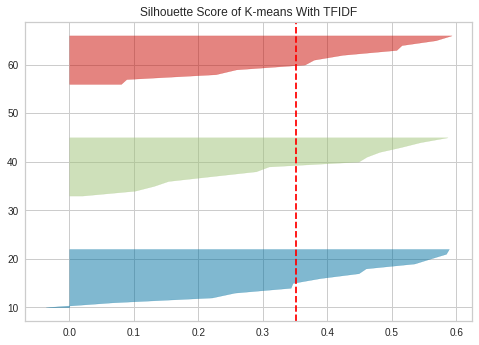

In [ ]:
visualize_silhouette_kmeans(tfidf_data_doc, tfidf_kmeans, "TFIDF");

In [ ]:
doc_data['Cluster_label'] = tfidf_kmeans_pred

In [ ]:
doc_data

,document,doc_content,lemma_doc,Cluster_label
0,Ramesses I,Menpehtyre Ramesses I (or Ramses) was the foun...,menpehtyre ramesses ramses wa founding pharaoh...,0
1,Tiye,"Tiye (c. 1398 BC – 1338 BC, also spelled Tye, ...",tiye also spelled tye taia tiy tiyi wa daughte...,2
2,Nefertiti,Neferneferuaten Nefertiti (c. 1370 – c. 1330...,neferneferuaten nefertiti wa queen dynasty anc...,2
3,Hatshepsut,"Hatshepsut or Hatchepsut, Egyptian Foremost of...",hatshepsut hatchepsut egyptian foremost noble ...,2
4,Tutankhamun,Tutankhamun Egyptological pronunciation Tutank...,tutankhamun egyptological pronunciation tutank...,2
5,Seti I,Menmaatre Seti I (or Sethos I in Greek) was a ...,menmaatre seti sethos greek wa pharaoh new kin...,0
6,Khufu,Khufu known to the ancient Greeks as Cheops; O...,khufu known ancient greek cheops old egyptian ...,0
7,Thutmose,Thutmose I (sometimes read as Thutmosis or Tut...,thutmose sometimes read thutmosis tuthmosis th...,2
8,Ramesses III,Usermaatre Meryamun Ramesses III (also written...,usermaatre meryamun ramesses iii also written ...,2
9,Ramesses II,Ramesses II (c. 1303–1213 BC) was the third ph...,ramesses wa third pharaoh nineteenth dynasty e...,0



 The most frequent 50 words of Cluster: 0



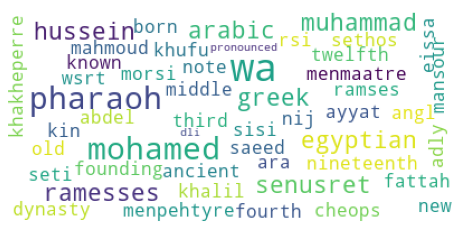


 The most frequent 50 words of Cluster: 2



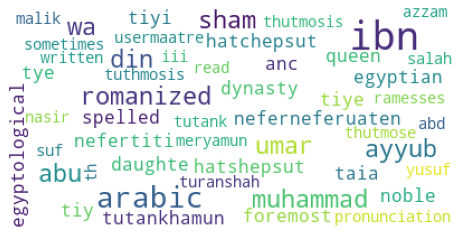


 The most frequent 50 words of Cluster: 1



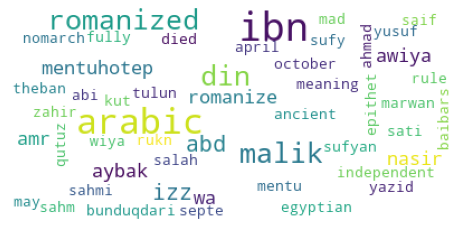

In [ ]:
# plot word cloud for the most frequent 50 words in each book  
import wordcloud

for label in doc_data['Cluster_label'].unique():
  books = doc_data[doc_data["Cluster_label"]==label]["lemma_doc"]

  #wordcloud 
  print(f"\n The most frequent 50 words of Cluster: {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=50, 
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

## First Classification with Cluster Labels

### KNN

cross_validation accuracy :   [0.42857143 0.33333333 0.66666667 0.5       ]

 average cross validation accuracy :   0.4821428571428571

 testing accuracy :   0.75 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         3

    accuracy                           0.75        12
   macro avg       0.50      0.67      0.57        12
weighted avg       0.56      0.75      0.64        12


Confusion Matrix:

[[5 0 0]
 [0 4 0]
 [2 1 0]]
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

----------------------------------------------------------------------------------------------
 The Documents that the Model Misclassify are  :  3
----------------------------------------------------------------------------------------------

Average bias: 0.250
Average variance: 0.042
----------------------------------------------------------------------------------------------


,doc_error,correct,Predicted
0,Neferneferuaten Nefertiti (c. 1370 – c. 1330...,2,0
1,Tutankhamun Egyptological pronunciation Tutank...,2,1
2,"Mentuhotep I, may have been a Theban nomarch a...",2,0


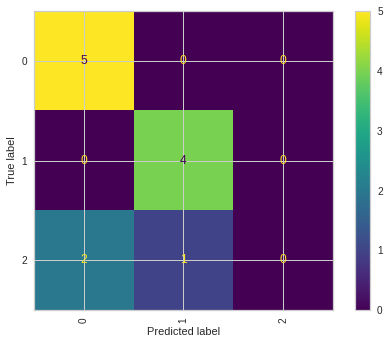

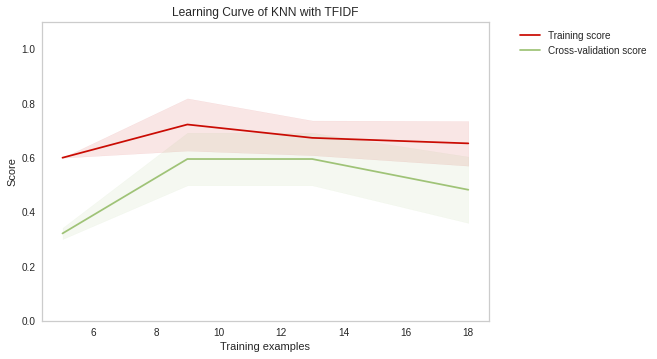

In [ ]:
from sklearn.model_selection import train_test_split
X_data= tfidf_doc.toarray()
y_data = doc_data['Cluster_label']

# Split data to train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data , y_data, test_size= 0.3, random_state= 42)
knn_cluster =  KNeighborsClassifier(n_neighbors = 5, algorithm= 'kd_tree', p=2)

KNN_model1, knn_pred1 = build_model(knn_cluster, "KNN with TFIDF", X_train1, X_test1, y_train1, y_test1 ,4)
which_one_misclassify(doc_data ,X_train1, y_train1, X_test1, y_test1 ,knn_pred1 , document = True)


### Decision Tree


cross_validation accuracy :   [0.42857143 0.33333333 0.33333333 0.5       ]

 average cross validation accuracy :   0.3988095238095238

 testing accuracy :   0.5 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.50      0.57         4
           2       0.20      0.33      0.25         3

    accuracy                           0.50        12
   macro avg       0.54      0.48      0.50        12
weighted avg       0.58      0.50      0.53        12


Confusion Matrix:

[[3 0 2]
 [0 2 2]
 [1 1 1]]
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


----------------------------------------------------------------------------------------------
 The Documents that the Model Misclassify are  :  6
----------------------------------------------------------------------------------------------

Average bias: 0.500
Average variance: 0.375
----------------------------------------------------------------------------------------------


,doc_error,correct,Predicted
0,"Tiye (c. 1398 BC – 1338 BC, also spelled Tye, ...",0,2
1,Neferneferuaten Nefertiti (c. 1370 – c. 1330...,2,1
2,Khufu known to the ancient Greeks as Cheops; O...,0,2
3,Ramesses II (c. 1303–1213 BC) was the third ph...,1,2
4,"Mentuhotep I, may have been a Theban nomarch a...",2,0
5,"Mentuhotep II (Ancient Egyptian: Mn-ṯw-ḥtp, me...",1,2


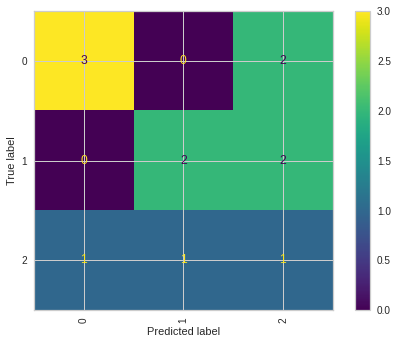

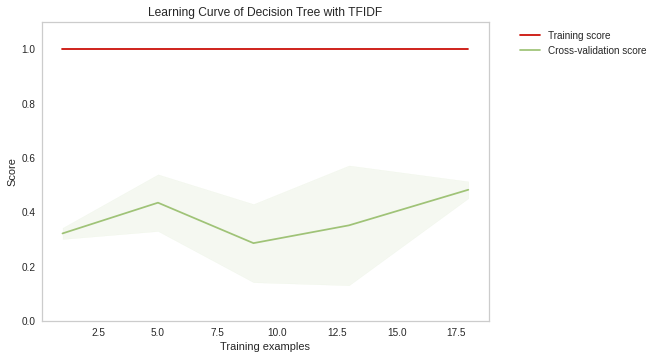

In [ ]:
# Build DT model
Decision_tree_tfidf = DecisionTreeClassifier(random_state=0, max_depth= 28)
DT_model, DT_pred1  = build_model(Decision_tree_tfidf, "Decision Tree with TFIDF", X_train1, X_test1, y_train1, y_test1,4)
which_one_misclassify(doc_data , X_train1, y_train1, X_test1, y_test1 ,DT_pred1 ,document=True) 



### SVM

cross_validation accuracy :   [0.57142857 0.83333333 0.83333333 0.83333333]

 average cross validation accuracy :   0.7678571428571429

 testing accuracy :   0.75 

----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      1.00      0.89         4
           2       0.50      0.33      0.40         3

    accuracy                           0.75        12
   macro avg       0.70      0.71      0.70        12
weighted avg       0.72      0.75      0.73        12


Confusion Matrix:

[[4 0 1]
 [0 4 0]
 [1 1 1]]
----------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


----------------------------------------------------------------------------------------------
 The Documents that the Model Misclassify are  :  3
----------------------------------------------------------------------------------------------

Average bias: 0.333
Average variance: 0.167
----------------------------------------------------------------------------------------------


,doc_error,correct,Predicted
0,Tutankhamun Egyptological pronunciation Tutank...,2,1
1,Khufu known to the ancient Greeks as Cheops; O...,0,2
2,"Mentuhotep I, may have been a Theban nomarch a...",2,0


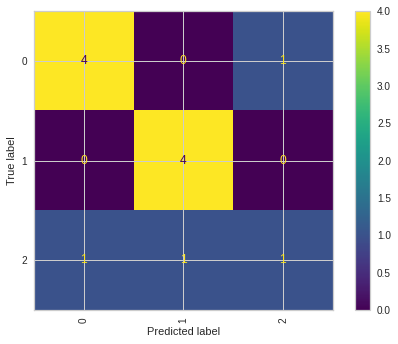

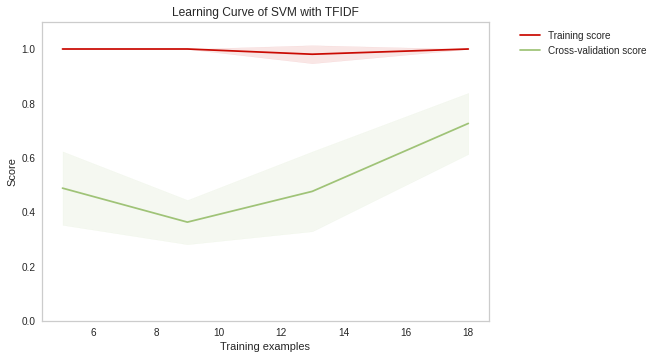

In [ ]:
# Build SVM model
svm_tfidf = svm.SVC(kernel='linear')
svm_model , svm_pred= build_model(svm_tfidf, "SVM with TFIDF", X_train1, X_test1, y_train1, y_test1 ,4 )
which_one_misclassify(doc_data , X_train1, y_train1, X_test1, y_test1 ,svm_pred , document=True)


In [ ]:

predicted_cluster = KNN_model1.predict(question_4_cls_1)
classifier1_output= predicted_cluster[0]

import pickle
with open(r'first_classifier.pkl','wb') as cl1_model_pkl:
  pickle.dump(KNN_model1, cl1_model_pkl, protocol=2)

In [ ]:
classifier1_output

0

## Second Classification with document labels
### Ranking Documents with BM25

In [ ]:
!pip install rank_bm25
from rank_bm25 import BM25Okapi

In [ ]:
docu_4_cls2= doc_data[doc_data["Cluster_label"] == classifier1_output]
candidate_docs = list(docu_4_cls2['doc_content'])
tokenized_corpus = [doc.split(" ") for doc in candidate_docs]
bm25 = BM25Okapi(tokenized_corpus)

tokenized_query = question.split(" ")
doc_scores = bm25.get_scores(tokenized_query)
top_rank_para =  bm25.get_top_n(tokenized_query, candidate_docs, n=3)[1]
candidate_document = docu_4_cls2.document[docu_4_cls2['doc_content']==top_rank_para ]
candidate_document = list(candidate_document)[0]
candidate_document

## Ranking Paragrahs with BM25 


In [ ]:
selected_document = data[data['doc_name'] == candidate_document]
selected_document = selected_document['paragraph']
corpus = list(selected_document)
tokenized_paras = [doc.split(" ") for doc in corpus]
bm25 = BM25Okapi(tokenized_paras)
tokenized_query = question.split(" ")

doc_scores = bm25.get_scores(tokenized_query)
top_rank_para =  bm25.get_top_n(tokenized_query, corpus, n=3)[2]
top_rank_para

"Seti's well preserved tomb (KV17) was found in 1817 by Giovanni Battista Belzoni, in the Valley of the Kings; it proved to be the longest at 446 feet (136 meters)[18] and deepest of all the New Kingdom royal tombs. It was also the first tomb to feature decorations (including the Book of the Heavenly Cow)[19] on every passageway and chamber with highly refined bas-reliefs and colorful paintings – fragments of which, including a large column depicting Seti I with the goddess Hathor, can be seen in the National Archaeological Museum, Florence. This decorative style set a precedent which was followed in full or in part in the tombs of later New Kingdom kings. Seti's mummy itself was discovered by Émil Brugsch on June 6, 1881 in the mummy cache (tomb DB320) at Deir el-Bahri, and has since been kept at the Egyptian Museum in Cairo.\n"

### langauage model (BERT)

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertForQuestionAnswering
import torch
from transformers import BertTokenizer
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [ ]:
# Apply the tokenizer to the input text, treating them as a text-pair.
input_ids = tokenizer.encode(question, top_rank_para)

#print('The input has a total of {:} tokens.'.format(len(input_ids)))

In [ ]:
# # BERT only needs the token IDs, but for the purpose of inspecting the 
# # tokenizer's behavior, let's also get the token strings and display them.
# tokens = tokenizer.convert_ids_to_tokens(input_ids)

# # For each token and its id...
# for token, id in zip(tokens, input_ids):
    
#     # If this is the [SEP] token, add some space around it to make it stand out.
#     if id == tokenizer.sep_token_id:
#         print('')
    
#     # Print the token string and its ID in two columns.
#     print('{:<12} {:>6,}'.format(token, id))

#     if id == tokenizer.sep_token_id:
#         print('')
    

In [ ]:
# Search the input_ids for the first instance of the `[SEP]` token.
sep_index = input_ids.index(tokenizer.sep_token_id)

# The number of segment A tokens includes the [SEP] token istelf.
num_seg_a = sep_index + 1

# The remainder are segment B.
num_seg_b = len(input_ids) - num_seg_a

# Construct the list of 0s and 1s.
segment_ids = [0]*num_seg_a + [1]*num_seg_b

# There should be a segment_id for every input token.
assert len(segment_ids) == len(input_ids)

In [ ]:
# Run our example through the model.
outputs = model(torch.tensor([input_ids]), # The tokens representing our input text.
                             token_type_ids=torch.tensor([segment_ids]), # The segment IDs to differentiate question from answer_text
                             return_dict=True) 

start_scores = outputs.start_logits
end_scores = outputs.end_logits


In [ ]:
# Find the tokens with the highest `start` and `end` scores.
answer_start = torch.argmax(start_scores)
answer_end = torch.argmax(end_scores)

# Combine the tokens in the answer and print it out.
answer = ' '.join(tokens[answer_start:answer_end+1])
# Start with the first token.
answer = tokens[answer_start]

# Select the remaining answer tokens and join them with whitespace.
for i in range(answer_start + 1, answer_end + 1):
    
    # If it's a subword token, then recombine it with the previous token.
    if tokens[i][0:2] == '##':
        answer += tokens[i][2:]
    
    # Otherwise, add a space then the token.
    else:
        answer += ' ' + tokens[i]

print('Answer: "' + answer + '"')

Answer: "1817"


In [ ]:
# import pickle
# with open(r'linearmodel.pkl','wb') as model_pkl:
#     pickle.dump(model, model_pkl, protocol=2)